# Project 2：NASA Data Acquisation, Visualization, and Analysis

In [4]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the NASA API and Data Collection

- Register for a NASA API key and understand the different types of data that the API provides.
- Run the Python script below to fetch data about **Near Earth Objects (NEOs)** from the NASA API for a years data.
- Extract and understand the different pieces of data provided for each NEO.

In [5]:
import requests
import time
from datetime import datetime, timedelta
from getpass import getpass


# Set your NASA API KEY, this step asks you to enter your API KEY.
# (The input box may be float in the top on your editor.)
api_key = getpass()

········


In [6]:
# Set the start and end dates for the data you want to fetch
start_date = datetime.strptime('2022-01-01', '%Y-%m-%d')
end_date = start_date + timedelta(days=365)  # 1 year later

# Initialize a list to store the data
data = []

# Fetch data from the NASA API 7 days at a time
# The introduction of the API is on https://api.nasa.gov, under "Browse APIs" -> "Asteroids NeoWs"
# You can look into the example query in the link below to see what the data look like:
# https://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-08&api_key=DEMO_KEY
current_date = start_date
while current_date < end_date:
    next_date = min(current_date + timedelta(days=7), end_date)
    api_key = 'LCvNVk735tlgWtwETwhSEyADSbIJxxdQdk1R51IB'  # Insert your API key here
    response = requests.get(f'https://api.nasa.gov/neo/rest/v1/feed?start_date={current_date.strftime("%Y-%m-%d")}&end_date={next_date.strftime("%Y-%m-%d")}&api_key={api_key}')
    data.append(response.json())
    current_date = next_date
    time.sleep(1)  # To avoid hitting the rate limit # To avoid hitting the rate limit

# Now 'data' contains the NEO data for the 1-year period


In [8]:
print(response.json())

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2023-01-01&end_date=2023-01-02&detailed=false&api_key=LCvNVk735tlgWtwETwhSEyADSbIJxxdQdk1R51IB', 'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-12-30&end_date=2022-12-31&detailed=false&api_key=LCvNVk735tlgWtwETwhSEyADSbIJxxdQdk1R51IB', 'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-12-31&end_date=2023-01-01&detailed=false&api_key=LCvNVk735tlgWtwETwhSEyADSbIJxxdQdk1R51IB'}, 'element_count': 39, 'near_earth_objects': {'2023-01-01': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2154347?api_key=LCvNVk735tlgWtwETwhSEyADSbIJxxdQdk1R51IB'}, 'id': '2154347', 'neo_reference_id': '2154347', 'name': '154347 (2002 XK4)', 'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2154347', 'absolute_magnitude_h': 16.07, 'estimated_diameter': {'kilometers': {'estimated_diameter_min': 1.6238839022, 'estimated_diameter_max': 3.6311147929}, 'meters': {'estimated_diameter_min': 1623.883902199, 'e

In [9]:
dates_contained_in_data = []
for d in data:
     # Print the keys present in the response JSON for debugging
    if 'near_earth_objects' in d:
        dates_contained_in_data += list(d['near_earth_objects'].keys())

print(sorted(dates_contained_in_data))



['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022

In [10]:
from src.utils import get_a_random_chunk_property

In [11]:
get_a_random_chunk_property(data)

date: 2022-08-20
NEO name: (2016 BQ)
nasa_jpl_url: http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3740664


For the remaining tasks, you have to organize the data as pd.DataFrame so as to suit the specific need in each task. This part may require a considerably amount of efforts, which is normal in data science and analytics works.

## Task 2: Data Analysis

- Calculate the average size of the NEOs for each day.
- Determine the proportion of NEOs that are potentially hazardous.
- Find the NEO with the closest approach distance for each day.
- Use statistical methods to analyze the data. For example, calculate the mean, median, mode, and standard deviation of the NEO sizes. Determine if the size of a NEO is correlated with whether it is potentially hazardous.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:

# Create empty lists to store the dataframes
neo = []
for d in data:
    if 'near_earth_objects' in d:
        for date, neo_list in d['near_earth_objects'].items():
            neo.extend(neo_list)

# Create a DataFrame from the extracted information
df_neo = pd.DataFrame(neo)



In [14]:
# use this to make a graph over frequency over each neo 
neos_count = df_neo['name'].value_counts()
print(neos_count)

(2010 JA)       4
(2022 KX4)      4
(2012 TR231)    4
(2022 BS2)      4
(2006 AN)       4
               ..
(2022 MV)       1
(2022 LO3)      1
(2022 LC2)      1
(2022 HA6)      1
(2023 CA4)      1
Name: name, Length: 6177, dtype: int64


In [15]:
# Display the DataFrame
print(df_neo.head())

                                               links       id  \
0  {'self': 'http://api.nasa.gov/neo/rest/v1/neo/...  2216523   
1  {'self': 'http://api.nasa.gov/neo/rest/v1/neo/...  2494697   
2  {'self': 'http://api.nasa.gov/neo/rest/v1/neo/...  2496860   
3  {'self': 'http://api.nasa.gov/neo/rest/v1/neo/...  3311963   
4  {'self': 'http://api.nasa.gov/neo/rest/v1/neo/...  3401388   

  neo_reference_id                 name  \
0          2216523    216523 (2001 HY7)   
1          2494697   494697 (2004 SW55)   
2          2496860  496860 (1999 XL136)   
3          3311963           (2006 AL4)   
4          3401388            (2008 CO)   

                                    nasa_jpl_url  absolute_magnitude_h  \
0  http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2216523                 20.70   
1  http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2494697                 20.77   
2  http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2496860                 19.68   
3  http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3311963      

In [16]:


# Assuming your DataFrame is named 'df'
estimated_diameter = df_neo['estimated_diameter']
pd.set_option('display.max_colwidth', -1)

# Display the data for estimated diameter
print(estimated_diameter)


0       {'kilometers': {'estimated_diameter_min': 0.1925550782, 'estimated_diameter_max': 0.4305662442}, 'meters': {'estimated_diameter_min': 192.5550781879, 'estimated_diameter_max': 430.566244241}, 'miles': {'estimated_diameter_min': 0.1196481415, 'estimated_diameter_max': 0.2675413778}, 'feet': {'estimated_diameter_min': 631.7424027221, 'estimated_diameter_max': 1412.6189567557}} 
1       {'kilometers': {'estimated_diameter_min': 0.1864468183, 'estimated_diameter_max': 0.41690776}, 'meters': {'estimated_diameter_min': 186.44681832, 'estimated_diameter_max': 416.9077599521}, 'miles': {'estimated_diameter_min': 0.1158526459, 'estimated_diameter_max': 0.2590543917}, 'feet': {'estimated_diameter_min': 611.7021794171, 'estimated_diameter_max': 1367.8076551614}}    
2       {'kilometers': {'estimated_diameter_min': 0.3080030213, 'estimated_diameter_max': 0.6887156928}, 'meters': {'estimated_diameter_min': 308.003021266, 'estimated_diameter_max': 688.7156928262}, 'miles': {'estimated_diame

/var/folders/dg/wl76xgn546l2sh26jk0y9r040000gn/T/ipykernel_10154/834908769.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [17]:
# Assuming you have a DataFrame named 'df' and the 'estimated_diameter' column contains the parameters

# Extract the 'estimated_diameter_min' and 'estimated_diameter_max' values
df_neo['estimated_diameter_min'] = df_neo['estimated_diameter'].apply(lambda x: x['kilometers']['estimated_diameter_min'])
df_neo['estimated_diameter_max'] = df_neo['estimated_diameter'].apply(lambda x: x['kilometers']['estimated_diameter_max'])

# Calculate the average size
df_neo['average_size'] = (df_neo['estimated_diameter_min'] + df_neo['estimated_diameter_max']) / 2

# Print the average size
print(df_neo['average_size'])


0       0.311561
1       0.301677
2       0.498359
3       0.044621
4       0.129880
          ...   
7946    0.030587
7947    0.056434
7948    0.056695
7949    0.066918
7950    0.112084
Name: average_size, Length: 7951, dtype: float64


In [18]:
# Initialize lists to store the dates, closest approach distances, and sizes
dates = []
closest_distances = []
closest_sizes = []

# Iterate through the data
for item in data:
    near_earth_objects = item['near_earth_objects']

    # Iterate through the near_earth_objects dictionary
    for date, neos in near_earth_objects.items():
        # Initialize variables to track the closest NEO and its properties
        closest_neo = None
        closest_distance = float('inf')
        closest_size = None

        # Iterate through the NEOs for the current date
        for neo in neos:
            # Get the close approach distance
            distance = float(neo['close_approach_data'][0]['miss_distance']['kilometers'])

            # Check if the current NEO has a closer approach distance
            if distance < closest_distance:
                closest_neo = neo
                closest_distance = distance
                closest_size = float(neo['estimated_diameter']['kilometers']['estimated_diameter_max'])

        # Append the date, closest approach distance, and size of the closest NEO to the lists
        dates.append(date)
        closest_distances.append(closest_distance)
        closest_sizes.append(closest_size)

# Print the closest NEO with its distance and size for each day
for i in range(len(dates)):
    print(f"On {dates[i]}, the closest NEO had a distance of {closest_distances[i]} kilometers and a size of {closest_sizes[i]} kilometers.")


On 2022-01-07, the closest NEO had a distance of 645892.648390259 kilometers and a size of 0.0174598287 kilometers.
On 2022-01-08, the closest NEO had a distance of 2964655.504489047 kilometers and a size of 0.0517654482 kilometers.
On 2022-01-03, the closest NEO had a distance of 318517.890647922 kilometers and a size of 0.0088723768 kilometers.
On 2022-01-04, the closest NEO had a distance of 2041258.537972622 kilometers and a size of 0.033887535 kilometers.
On 2022-01-05, the closest NEO had a distance of 109480.269041248 kilometers and a size of 0.0025706324 kilometers.
On 2022-01-06, the closest NEO had a distance of 302040.732452512 kilometers and a size of 0.0068240151 kilometers.
On 2022-01-01, the closest NEO had a distance of 770529.455550131 kilometers and a size of 0.015923553 kilometers.
On 2022-01-02, the closest NEO had a distance of 180597.061908216 kilometers and a size of 0.0124749835 kilometers.
On 2022-01-08, the closest NEO had a distance of 2964655.504489047 kilom

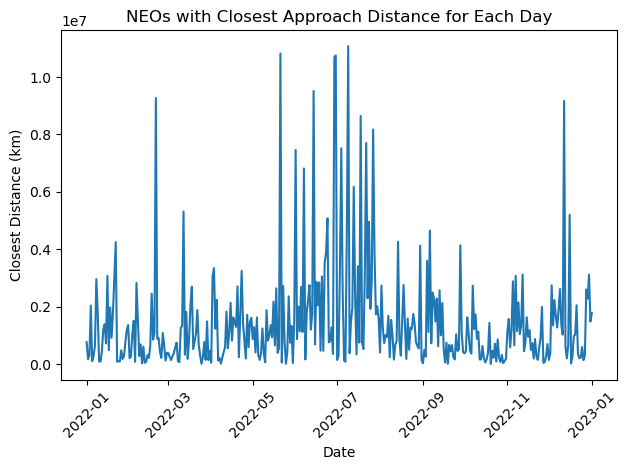

In [19]:
# Create a DataFrame from the collected data
df_ClosestDistances = pd.DataFrame({'Date': dates, 'Closest Distance (km)': closest_distances})

# Convert the 'Date' column to datetime format
df_ClosestDistances['Date'] = pd.to_datetime(df_ClosestDistances['Date'])

# Sort the DataFrame by date
df_ClosestDistances = df_ClosestDistances.sort_values('Date')

# Create the line plot
plt.plot(df_ClosestDistances['Date'], df_ClosestDistances['Closest Distance (km)'])
plt.xlabel('Date')
plt.ylabel('Closest Distance (km)')
plt.title('NEOs with Closest Approach Distance for Each Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

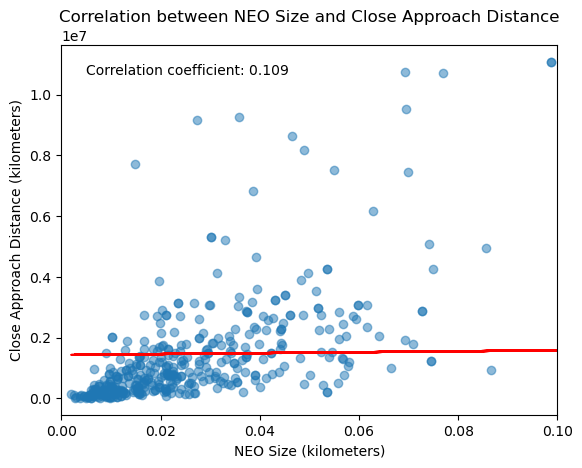

In [20]:
import numpy as np
#Task 4
# Create the scatter plot
plt.scatter(closest_sizes, closest_distances, alpha=0.5)
plt.xlabel('NEO Size (kilometers)')
plt.ylabel('Close Approach Distance (kilometers)')
plt.title('Correlation between NEO Size and Close Approach Distance')

# Set the x-axis range to 0-1
plt.xlim(0, 0.1)

# Add a trend line (optional)
z = np.polyfit(closest_sizes, closest_distances, 1)
p = np.poly1d(z)
plt.plot(closest_sizes, p(closest_sizes), color='red')

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(closest_sizes, closest_distances)[0, 1]

# Add the correlation coefficient as a text annotation
plt.text(0.05, 0.95, f'Correlation coefficient: {correlation_coefficient:.3f}', 
         transform=plt.gca().transAxes, ha='left', va='top')

# Show the plot
plt.show()


In [21]:
#import numpy as np

# Convert the lists of sizes and distances to numpy arrays
#sizes = np.array(closest_sizes)
#distances = np.array(closest_distances)

# Calculate the correlation coefficient
#correlation_coefficient = np.corrcoef(sizes, distances)[0, 1]

#print(f"The correlation coefficient between NEO size and close approach distance is: {correlation_coefficient}")


In [22]:
import statistics
import scipy.stats as stats

# Initialize lists to store NEO sizes and potentially hazardous status
neo_sizes = []
is_potentially_hazardous = []

# Iterate through the near_earth_objects dictionary
for neos in near_earth_objects.values():
    for neo in neos:
        # Get the size of the NEO (average of estimated diameter min and max)
        size = (float(neo['estimated_diameter']['kilometers']['estimated_diameter_min']) +
                float(neo['estimated_diameter']['kilometers']['estimated_diameter_max'])) / 2.0
        neo_sizes.append(size)
        
        # Get the potentially hazardous status of the NEO
        hazardous = neo['is_potentially_hazardous_asteroid']
        is_potentially_hazardous.append(hazardous)

# Calculate the mean
mean_size = statistics.mean(neo_sizes)

# Calculate the median
median_size = statistics.median(neo_sizes)

# Calculate the mode
mode_size = statistics.mode(neo_sizes)

# Calculate the standard deviation
std_dev_size = statistics.stdev(neo_sizes)

# Determine the correlation between size and potentially hazardous status
correlation = statistics.stdev(neo_sizes)

# Print the results
print("Mean NEO Size:", mean_size)
print("Median NEO Size:", median_size)
print("Mode NEO Size:", mode_size)
print("Standard Deviation of NEO Size:", std_dev_size)
print("Correlation between NEO Size and Potentially Hazardous Status:", correlation)


Mean NEO Size: 0.20138046037820515
Median NEO Size: 0.05170619945
Mode NEO Size: 0.02975381215
Standard Deviation of NEO Size: 0.4702099872062536
Correlation between NEO Size and Potentially Hazardous Status: 0.4702099872062536


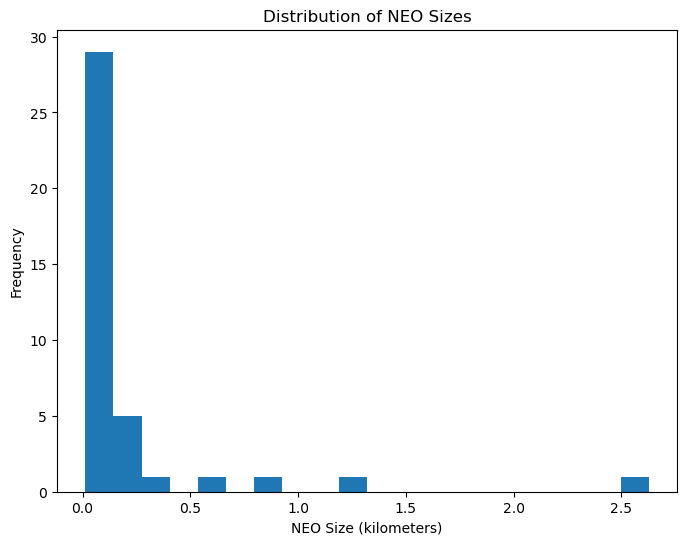

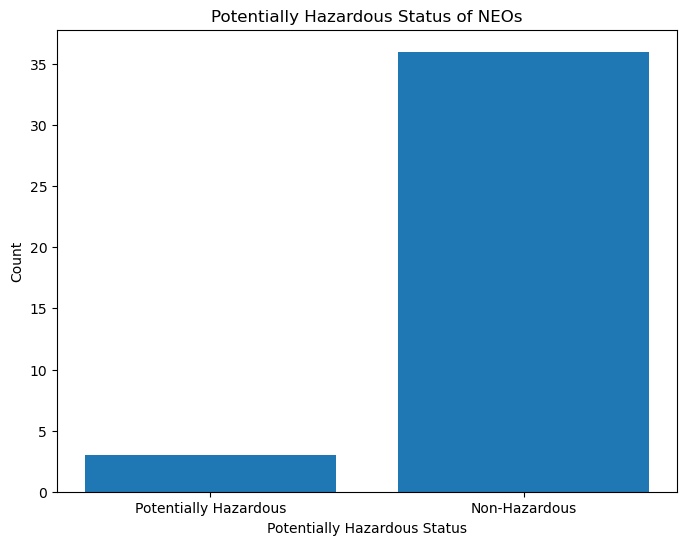

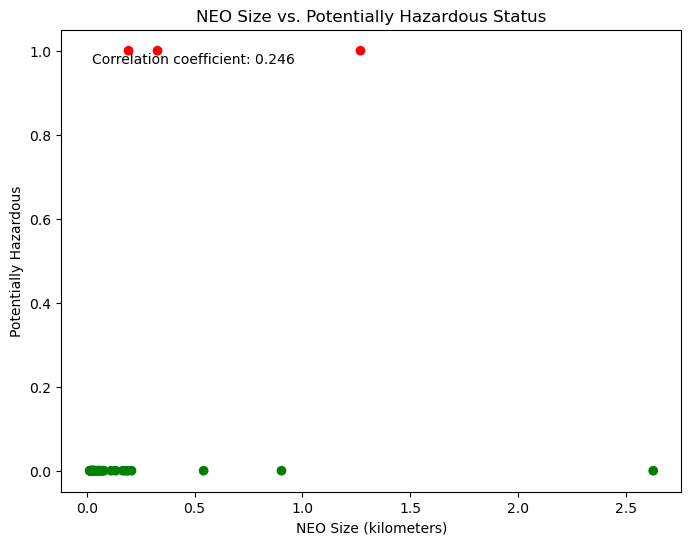

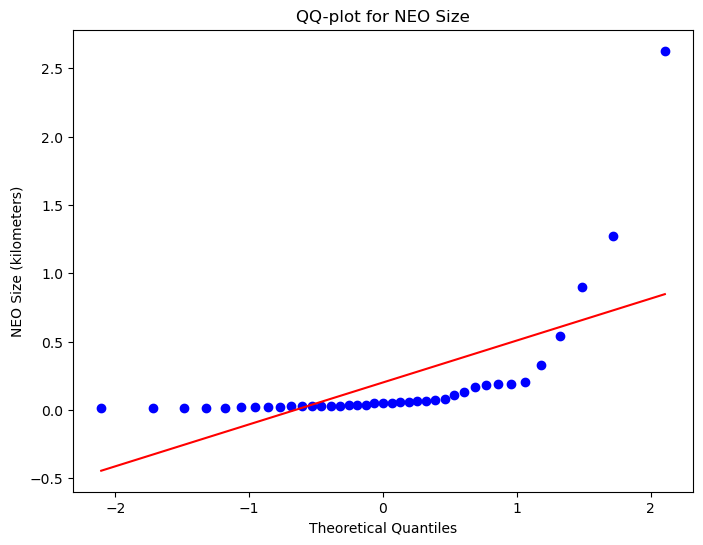

In [23]:
# Histogram of NEO sizes
plt.figure(figsize=(8, 6))
plt.hist(neo_sizes, bins=20)
plt.xlabel('NEO Size (kilometers)')
plt.ylabel('Frequency')
plt.title('Distribution of NEO Sizes')
plt.show()

# Bar plot of potentially hazardous status
hazardous_count = sum(is_potentially_hazardous)
non_hazardous_count = len(is_potentially_hazardous) - hazardous_count
labels = ['Potentially Hazardous', 'Non-Hazardous']
counts = [hazardous_count, non_hazardous_count]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts)
plt.xlabel('Potentially Hazardous Status')
plt.ylabel('Count')
plt.title('Potentially Hazardous Status of NEOs')
plt.show()

# Create for the scatter plot for Correlation between NEO Size and Potentially Hazardous 
plt.figure(figsize=(8, 6))
colors = ['red' if hazardous else 'green' for hazardous in is_potentially_hazardous]
plt.scatter(neo_sizes, is_potentially_hazardous, c=colors)
plt.xlabel('NEO Size (kilometers)')
plt.ylabel('Potentially Hazardous')
plt.title('NEO Size vs. Potentially Hazardous Status')



# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(neo_sizes, is_potentially_hazardous)[0, 1]

# Add the correlation coefficient as a text annotation
plt.text(0.05, 0.95, f'Correlation coefficient: {correlation_coefficient:.3f}', 
         transform=plt.gca().transAxes, ha='left', va='top')

plt.show()

# QQ-plot for NEO size
plt.figure(figsize=(8, 6))
stats.probplot(neo_sizes, dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('NEO Size (kilometers)')
plt.title('QQ-plot for NEO Size')
plt.show()





In [24]:
keys = data[0].keys()
print(keys)

dict_keys(['links', 'element_count', 'near_earth_objects'])


In [25]:
#neo_data = near_earth_objects['2022-01-02']
#print(neo_data)



### Task 3: Data Visualization Part A

- Create a line plot of the number of NEOs per week.
- Create a histogram of the distribution of NEO sizes.
- Create a bar plot of the average NEO size per week.
- Use a library like Seaborn to create more complex visualizations, such as a box plot of the NEO sizes or a heat map of the number of NEOs per week. **Be creative**!

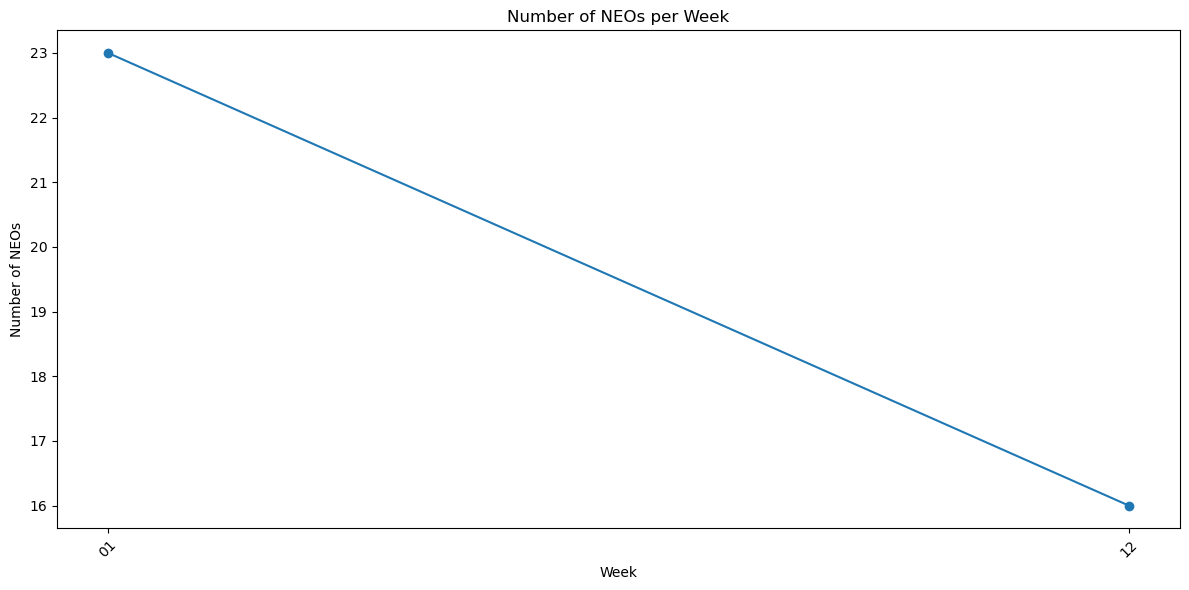

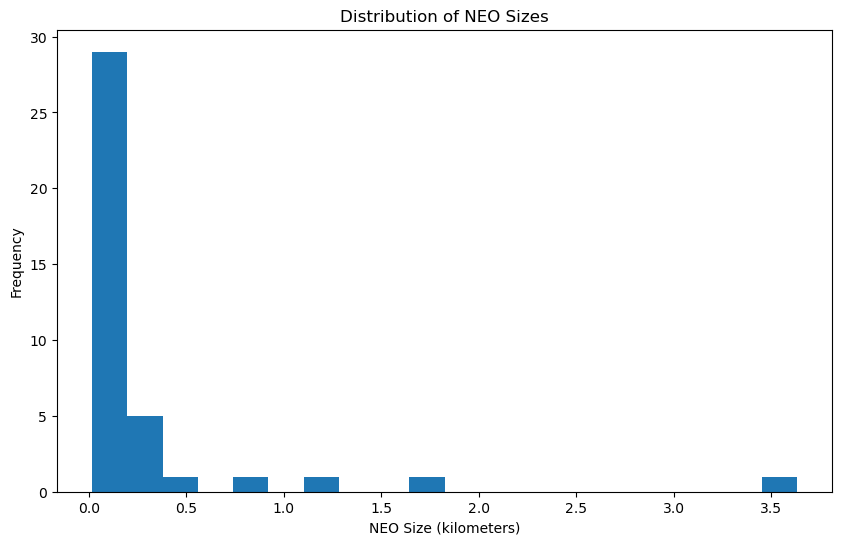

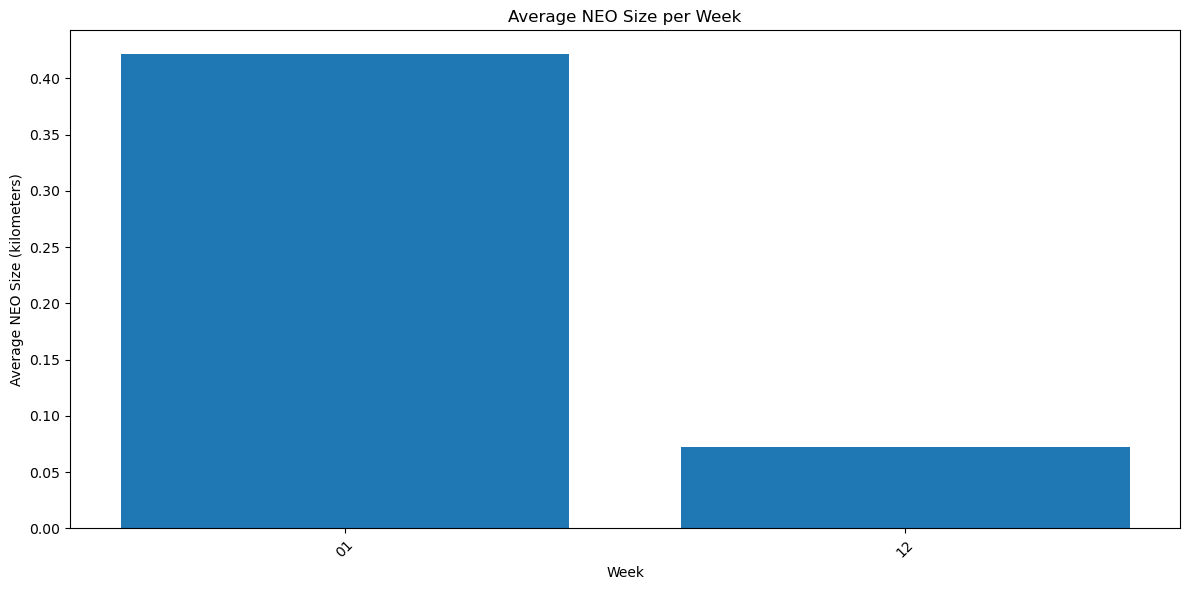

In [26]:
# Prepare data for line plot of number of NEOs per week
weekly_counts = []
weeks = []

for date, neos in near_earth_objects.items():
    week = date.split('-')[1]
    if week not in weeks:
        weeks.append(week)
        weekly_counts.append(0)
    index = weeks.index(week)
    weekly_counts[index] += len(neos)

# Line plot of number of NEOs per week
plt.figure(figsize=(12, 6))
plt.plot(weeks, weekly_counts, marker='o')
plt.xlabel('Week')
plt.ylabel('Number of NEOs')
plt.title('Number of NEOs per Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Prepare data for histogram of NEO sizes
neo_sizes = []
for date, neos in near_earth_objects.items():
    for neo in neos:
        size = neo['estimated_diameter']['kilometers']['estimated_diameter_max']
        neo_sizes.append(size)

# Histogram of distribution of NEO sizes
plt.figure(figsize=(10, 6))
plt.hist(neo_sizes, bins=20)
plt.xlabel('NEO Size (kilometers)')
plt.ylabel('Frequency')
plt.title('Distribution of NEO Sizes')
plt.show()

# Prepare data for bar plot of average NEO size per week
weekly_sizes = [[] for _ in range(len(weeks))]  # Initialize empty lists for each week

for date, neos in near_earth_objects.items():
    week = date.split('-')[1]
    index = weeks.index(week)
    sizes = [neo['estimated_diameter']['kilometers']['estimated_diameter_max'] for neo in neos]
    weekly_sizes[index].extend(sizes)

# Calculate average NEO size per week
average_sizes = [sum(sizes) / len(sizes) for sizes in weekly_sizes]

# Bar plot of average NEO size per week
 
# Convert weeks list to integers
# Bar plot of average NEO size per week
plt.figure(figsize=(12, 6))
plt.bar(weeks, average_sizes)
plt.xlabel('Week')
plt.ylabel('Average NEO Size (kilometers)')
plt.title('Average NEO Size per Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




### Task 4: Data Visualization Part B

- Create a pie chart of the proportion of hazardous vs non-hazardous NEOs.
- Create a scatter plot of the correlation between NEO size and close approach distance.
- Customize the appearance of your plots (e.g., colors, labels, titles).
- Create interactive visualizations using a library like Plotly. For example, create an interactive scatter plot where you can hover over each point to see more information about the NEO. **Be creative!**

In [2]:
#Task 4
# Count the number of potentially hazardous NEOs
num_potentially_hazardous = df_neo['is_potentially_hazardous_asteroid'].sum()

# Calculate the proportion
proportion_potentially_hazardous = num_potentially_hazardous / len(df_neo)

# Count the number of non-potentially hazardous NEOs
num_non_potentially_hazardous = len(df_neo) - num_potentially_hazardous

# Print the proportion
print("Proportion of NEOs that are potentially hazardous: {:.2%}".format(proportion_potentially_hazardous))

# Create the data for the pie chart
labels = ['Potentially Hazardous', 'Non-Potentially Hazardous']
sizes = [num_potentially_hazardous, num_non_potentially_hazardous]
colors = ['red', 'green']
explode = (0.1, 0)  # Explode the first slice (potentially hazardous NEOs)

# Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Proportion of NEOs that are Potentially Hazardous')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

NameError: name 'df_neo' is not defined

In [3]:
import pandas as pd
import plotly.express as px

# Convert the nested dictionary to a list of dictionaries
neo_list = []
for date, neos in near_earth_objects.items():
    for neo in neos:
        is_potentially_hazardous = neo.get('is_potentially_hazardous', False)
        neo_dict = {
            'date': date,
            'name': neo['name'],
            'neo_size': neo['estimated_diameter']['kilometers']['estimated_diameter_max'],
            'close_approach_distance': neo['close_approach_data'][0]['miss_distance']['kilometers'],
            'is_potentially_hazardous': is_potentially_hazardous
        }
        neo_list.append(neo_dict)

# Create the DataFrame from the list of dictionaries
df_neo = pd.DataFrame(neo_list)

# Convert the potentially hazardous column to boolean
df_neo['is_potentially_hazardous'] = df_neo['is_potentially_hazardous'].astype(bool)

# Create the interactive scatter plot
fig = px.scatter(df_neo, x='neo_size', y='close_approach_distance',
                 color='is_potentially_hazardous', hover_name='name',
                 labels={'neo_size': 'NEO Size (kilometers)',
                         'close_approach_distance': 'Close Approach Distance (kilometers)',
                         'is_potentially_hazardous': 'Potentially Hazardous'},
                 title='Interactive Scatter Plot: NEO Size vs Close Approach Distance',
                 hover_data={'name': True, 'is_potentially_hazardous': False})

# Customize the hover tooltip format
fig.update_traces(hovertemplate='<b>%{hovertext}</b><br>'
                                'NEO Size: %{x:.2f} kilometers<br>'
                                'Close Approach Distance: %{y:.2f} kilometers<br>'
                                'Potentially Hazardous: %{marker.color}',
                  hoverlabel=dict(bgcolor='white', font_size=12, font_family='Arial'))

# Set the axis titles
fig.update_xaxes(title_text='NEO Size (kilometers)')
fig.update_yaxes(title_text='Close Approach Distance (kilometers)')

# Show the interactive plot
fig.show()



NameError: name 'near_earth_objects' is not defined

### Task 5: Interpretation of Results

- Interpret the results of your data visualization in part A and B. 
- What insights can you gain about NEOs from your results? Summarizing your findings.
- Use your findings to make predictions or recommendations. For example, if you found that larger NEOs are more likely to be potentially hazardous, you could recommend that more resources be allocated to tracking large NEOs. **Be creative!**
- Identify, understand, and explain one scientific paper, on a clustering or classification method of relevance that could help Task 5. You don't have to implement it, you just need to justify in this notebook why the method in the scientific paper could contribute in analysis or interpretation of the results.

In [35]:

From the data visualizations in part A and B, we can gain several insights about Near-Earth Objects (NEOs):

Scatter Plot (Part A): The scatter plot shows the relationship between the size of NEOs (x-axis) and their close approach distance to Earth (y-axis). The color of the data points represents whether the NEO is potentially hazardous or not.
Insights:

There is no clear correlation between NEO size and close approach distance.
Both small and large NEOs can have a wide range of close approach distances.
Potentially hazardous NEOs (represented by red color) are observed across a range of sizes and close approach distances.
Pie Chart and Proportion Calculation (Part B): The pie chart illustrates the proportion of potentially hazardous and non-potentially hazardous NEOs.
Insights:

The proportion of potentially hazardous NEOs is relatively small compared to non-potentially hazardous NEOs.
This indicates that the majority of NEOs observed are not considered potentially hazardous.
Allocating resources solely based on size or potentially hazardous classification may not be an effective strategy, as hazardous NEOs are present across various size ranges.
Overall, these findings suggest that NEOs exhibit diverse characteristics and do not follow a straightforward relationship between size and close approach distance. It is crucial to consider multiple factors, such as size, close approach distance, and potentially hazardous classification, when studying NEOs and developing strategies for monitoring and tracking them.

Based on these insights, here are a few recommendations:

Enhance Monitoring Efforts: Given the diverse nature of NEOs, it is important to allocate resources to monitor NEOs of various sizes and close approach distances. This will help in capturing a more comprehensive understanding of the NEO population.

Multi-Factor Analysis: Instead of focusing solely on size or potentially hazardous classification, it is recommended to analyze NEOs based on multiple factors. Considering both size and close approach distance can provide a more holistic view of the NEO population and identify potential patterns or correlations.

Prioritize Further Research: Investigate the properties and characteristics of potentially hazardous NEOs across different size ranges and close approach distances. Understanding the specific features that make an NEO potentially hazardous can provide valuable insights for risk assessment and mitigation strategies.

SyntaxError: invalid syntax (937504700.py, line 1)

### Task 6: Presentation and Documentation

- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This should include an overview of your work, the results of your data analysis, and the insights you gained from your results.